In [57]:
import torch
from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset
from torch_geometric.data import Dataset
import pandas as pd

import statistics
from tqdm import tqdm
import numpy as np
import random
import os
import matplotlib.pyplot as plt

In [58]:
import torch
from torch_geometric.data import InMemoryDataset
from tqdm import tqdm
from torch_geometric.data import Dataset
# from torch.utils.data import DataLoader
from torch_geometric.data import DataLoader

import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GATConv
import sklearn
from math import sqrt
import random
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [59]:
# y_folder = r'../../Data2/Dataset_Prepared/Y_Day_timeseries/Train'
# y_files_list = os.listdir(y_folder)

In [60]:
# y_files_list

In [61]:
# df_y = pd.read_csv(r'../../Data2/Dataset_Prepared/Y_Day_timeseries/Train/2013_10_27.csv')

In [62]:
# df_x = pd.read_csv(r'../../Data2/Dataset_Prepared/Road_Segments_Dir/New_Road_Segments_Divided_2013.csv')

In [63]:
# columns = ['StreetWidt', 'Length', 
#            'D_Busstop','D_Subway', 
#            'Commercial', 'CulturalFa', 'EducationF','Government', 'HealthServ', 
#            'Miscellane', 'PublicSafe', 'Recreation', 'ReligiousI', 'Residentia', 
#            'SocialServ', 'Transporta', 'Water',
#            'Avg_B01001', 'Avg_B010_1', 'Avg_B010_2', 'Avg_B010_3', 'Avg_B02001',
#            'Avg_B020_1', 'Avg_B020_2', 'Avg_B08006', 'Avg_B080_1', 'Avg_B080_2',
#            'Avg_B08013', 'Avg_B08124', 'Avg_B15003', 'Avg_B19001', 'Avg_B19013',
#            'Avg_B23013', 'Avg_B24011', 'Avg_B240_1', 'Avg_B240_2', 'Avg_B240_3',
#            'Avg_B240_4', 'Avg_B240_5', 'Avg_B240_6', 'Avg_B240_7', 'Avg_B240_8',
#            'Avg_B240_9', 'Avg_B24_10', 'Avg_B24_11', 'Avg_B24_12', 'Avg_B24_13',
#            'Avg_B24_14', 'Avg_B24_15', 'Avg_B24_16', 'Avg_B24_17', 'Avg_B24_18',
#            'Avg_B24_19', 'Avg_B24_20', 'Avg_B24_21', 'Avg_B24_22', 'Avg_B24_23',
#            'Avg_B24_24']

In [64]:
# df_x = df_x[columns]

In [65]:
# df_x = (df_x - df_x.mean())/df_x.std()

In [66]:
# df_x

In [106]:
class NYCTrafficCountDataset(Dataset):
    def __init__(self, path):
        super(NYCTrafficCountDataset, self).__init__(None)
        self.path = path
        self.time_list = os.listdir(self.path)

        self.x_folder = r'../../Data2/Dataset_Prepared/Road_Segments_Dir/'

        edge_path = r'../../Data2/Dataset_Prepared/adjacentMatrix.csv'
        
        self.column_list = ['StreetWidt', 'Length', 
           'D_Busstop','D_Subway', 
           'Commercial', 'CulturalFa', 'EducationF','Government', 'HealthServ', 
           'Miscellane', 'PublicSafe', 'Recreation', 'ReligiousI', 'Residentia', 
           'SocialServ', 'Transporta', 'Water',
           'Avg_B01001', 'Avg_B010_1', 'Avg_B010_2', 'Avg_B010_3', 'Avg_B02001',
           'Avg_B020_1', 'Avg_B020_2', 'Avg_B08006', 'Avg_B080_1', 'Avg_B080_2',
           'Avg_B08013', 'Avg_B08124', 'Avg_B15003', 'Avg_B19001', 'Avg_B19013',
           'Avg_B23013', 'Avg_B24011', 'Avg_B240_1', 'Avg_B240_2', 'Avg_B240_3',
           'Avg_B240_4', 'Avg_B240_5', 'Avg_B240_6', 'Avg_B240_7', 'Avg_B240_8',
           'Avg_B240_9', 'Avg_B24_10', 'Avg_B24_11', 'Avg_B24_12', 'Avg_B24_13',
           'Avg_B24_14', 'Avg_B24_15', 'Avg_B24_16', 'Avg_B24_17', 'Avg_B24_18',
           'Avg_B24_19', 'Avg_B24_20', 'Avg_B24_21', 'Avg_B24_22', 'Avg_B24_23',
           'Avg_B24_24']


        edge_df = pd.read_csv(edge_path)

        self.From = edge_df['From'].values
        self.To = edge_df['To'].values
        
    def len(self):
        return len(self.time_list)
    @property
    def raw_file_names(self):
        return []
#     def processed_file_names(self):
#         return ['files']
#     def download(self):
#         return 0.5
#     def indices


    
    def get(self, idx):
        
        time = self.time_list[idx]
        year = time.split('_')[0]
        
        x_name = 'New_Road_Segments_Divided_' + year + '.csv'
        x_path = os.path.join(self.x_folder, x_name)
        x_df = pd.read_csv(x_path)
        x_df = x_df[self.column_list]
        x_df = (x_df - x_df.mean())/x_df.std()
        self.x = x_df.values
        
        
        
        time_path = os.path.join(self.path, time)
        df_time_series = pd.read_csv(time_path).drop('Unnamed: 0', axis=1).values
        
        x_extend_start = random.choice(range(20, 70))
        
        x_extend_length = 12
        y_extend_length = 4
        
        x_extend = df_time_series[:, x_extend_start: x_extend_start + x_extend_length]
        y = df_time_series[:, x_extend_start + x_extend_length : x_extend_start + x_extend_length + y_extend_length]
#         y = np.sum(y, axis=1)
        x_raw = self.x.copy()
        x_new = np.append(x_raw, x_extend, 1)
        
        g_y = torch.tensor(y, dtype=torch.float)
        g_x = torch.tensor(x_new, dtype=torch.float)
        edge_index = torch.tensor([self.From, self.To], dtype=torch.long)
        data = Data(x=g_x, edge_index=edge_index, y=g_y)
        
        return data
        

In [107]:
train_dataset = NYCTrafficCountDataset(r'../../Data2/Dataset_Prepared/Y_Day_timeseries/Train/')
train_dataset = train_dataset.shuffle()

val_dataset = NYCTrafficCountDataset(r'../../Data2/Dataset_Prepared/Y_Day_timeseries/Val/')
val_dataset = val_dataset.shuffle()

test_dataset = NYCTrafficCountDataset(r'../../Data2/Dataset_Prepared/Y_Day_timeseries/Test/')
test_dataset = test_dataset.shuffle()

In [108]:
training_dataloader = DataLoader(train_dataset, 
                                 batch_size=1, 
                                 shuffle=False, 
                                 num_workers=10)
validation_dataloader = DataLoader(val_dataset, 
                                 batch_size=1, 
                                 shuffle=False, 
                                 num_workers=5)
test_dataloader = DataLoader(test_dataset, 
                                 batch_size=1, 
                                 shuffle=False, 
                                 num_workers=5)

# Training

## GAT-LSTM

In [109]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 128)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(128, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index
        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))  

        x = self.conv3(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training) 
        
        x = self.conv4(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training, p=0.1) 
        
        x = self.conv5(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=0.1) 

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        x = torch.cat((x, t), 1)
        
        x = self.linear1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.1)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x

In [111]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = Net().to(device)

learning_rate = 0.001
# loss_function = nn.MSELoss()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# model = Net().to(device)
# model.load_state_dict(torch.load(r'../Weights/Best/best.pt'))
epoch = 100


train_loss_list = []
val_loss_list = []

train_loss_percentage_list = []
val_loss_percentage_list = []


for i in range(epoch):
    
    print('------------' + str(i) + '-------------')
    train_loss = []
    validation_loss = []
    train_loss_percentage = []
    validation_loss_percentage = []
    best = 100000000
    best_path = r'../../Data2/Weights_project/GAT_LSTM/Best/best.pt'
    for batch in tqdm(training_dataloader):
        optimizer.zero_grad()

        batch.to(device)
        out = model(batch)
        out = out.reshape(batch.y.shape[0], 4)

        train_mask = (batch.y != -1)

        l = loss_function(out[train_mask], batch.y[train_mask])
        l.backward()
        optimizer.step()

        train_loss.append(l.tolist())
        train_loss_percentage.append(l.tolist()/(batch.y[train_mask].mean().tolist()+0.000001)) 

    
    with torch.no_grad():
        for batch in validation_dataloader:
            batch.to(device)
            out_val = model(batch)
            out_val = out_val.reshape(batch.y.shape[0], 4)
            val_mask = (batch.y != -1)
            
            loss_val = loss_function(out_val[val_mask], batch.y[val_mask])
#             print(loss_val)
            loss_val_percentage = loss_val/(batch.y[val_mask].mean().tolist()+0.000001)
    
            
            validation_loss.append(loss_val.tolist())
            validation_loss_percentage.append(loss_val_percentage.tolist())
            
                
    train_loss = np.array(train_loss)
    train_loss_percentage = np.array(train_loss_percentage)

    train_loss = train_loss[~pd.isnull(train_loss)].tolist()
    train_loss_percentage = train_loss_percentage[~pd.isnull(train_loss_percentage)].tolist()
    
    

    validation_loss = np.array(validation_loss)
    validation_loss_percentage = np.array(validation_loss_percentage)

    validation_loss = validation_loss[~pd.isnull(validation_loss)].tolist()
    validation_loss_percentage = validation_loss_percentage[~pd.isnull(validation_loss_percentage)].tolist()

    average_train_loss = sum(train_loss)/len(train_loss)
    average_val_loss = sum(validation_loss)/len(validation_loss)
    average_train_loss_percentage = sum(train_loss_percentage)/len(train_loss_percentage)
    average_val_loss_percentage = sum(validation_loss_percentage)/len(validation_loss_percentage)
    
    train_loss_list.append(average_train_loss)
    val_loss_list.append(average_val_loss)
    train_loss_percentage_list.append(average_train_loss_percentage)
    val_loss_percentage_list.append(average_val_loss_percentage)
    
    print('Trainning loss is: ' + str(average_train_loss) + '    , validation loss is: ' + str(average_val_loss))
    print('Trainning loss p is: ' + str(average_train_loss_percentage) + '    , validation p loss is: ' + str(average_val_loss_percentage))

    if average_val_loss < best:
        best = average_val_loss
        torch.save(model.state_dict(), best_path)
    if i%5 == 0:
        epoch_path = os.path.join(r'../../Data2/Weights_project/GAT_LSTM/Epoch', str(i) + '.pt')
        torch.save(model.state_dict(), epoch_path)
        

------------0-------------


  6%|██▎                                       | 14/250 [00:36<10:08,  2.58s/it]


KeyboardInterrupt: 

In [ ]:
# plt.plot(train_loss)
plt.plot(train_loss_list)
plt.plot(val_loss_list)

In [ ]:
a = np.array([train_loss_list, val_loss_list])
a = a.T
loss_df = pd.DataFrame(a, columns=['train_loss', 'val_loss'])
loss_df.to_csv(r'../../Data2/Weights_project/GAT_LSTM/train_validation_loss.csv')

In [ ]:
ls_df = pd.read_csv(r'../../Data2/Weights_project/GAT_LSTM/train_validation_loss.csv')
ls_df = ls_df[['train_loss', 'val_loss']].values
ls_df = ls_df * 156
fig = plt.figure(figsize=(15, 5))
plt.plot(ls_df[0:400, 0], label='Training')
plt.plot(ls_df[0:400, 1], label='Validation')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('MAE (vehicle/15 minutes)', fontweight='bold')
plt.legend()
plt.rcParams.update({'font.size': 15, 'font.weight': 'semibold'})
plt.savefig(r'../../Data2/Figures/Training_Process.png')

## Train LSTM

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 128)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(64, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index

        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))
        

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        
        x = self.linear1(t)
        x = F.sigmoid(x)
        x = F.dropout(x)
        
        x = self.linear2(x)
        x = F.relu(x)
        x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x
        

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = Net().to(device)

learning_rate = 0.001
# loss_function = nn.MSELoss()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# model = Net().to(device)
# model.load_state_dict(torch.load(r'../Weights/Best/best.pt'))
epoch = 100


train_loss_list = []
val_loss_list = []

train_loss_percentage_list = []
val_loss_percentage_list = []


for i in range(epoch):
    
    print('------------' + str(i) + '-------------')
    train_loss = []
    validation_loss = []
    train_loss_percentage = []
    validation_loss_percentage = []
    best = 100000000
    best_path = r'../../Data2/Weights_project/LSTM/Best/best.pt'
    for batch in tqdm(training_dataloader):
        optimizer.zero_grad()

        batch.to(device)
        out = model(batch)
        out = out.reshape(batch.y.shape[0], 4)

        train_mask = (batch.y != -1)

        l = loss_function(out[train_mask], batch.y[train_mask])
        l.backward()
        optimizer.step()

        train_loss.append(l.tolist())
        train_loss_percentage.append(l.tolist()/(batch.y[train_mask].mean().tolist()+0.000001)) 

    
    with torch.no_grad():
        for batch in validation_dataloader:
            batch.to(device)
            out_val = model(batch)
            out_val = out_val.reshape(batch.y.shape[0], 4)
            val_mask = (batch.y != -1)
            
            loss_val = loss_function(out_val[val_mask], batch.y[val_mask])
#             print(loss_val)
            loss_val_percentage = loss_val/(batch.y[val_mask].mean().tolist()+0.000001)
    
            
            validation_loss.append(loss_val.tolist())
            validation_loss_percentage.append(loss_val_percentage.tolist())
            
                
    train_loss = np.array(train_loss)
    train_loss_percentage = np.array(train_loss_percentage)

    train_loss = train_loss[~pd.isnull(train_loss)].tolist()
    train_loss_percentage = train_loss_percentage[~pd.isnull(train_loss_percentage)].tolist()
    
    

    validation_loss = np.array(validation_loss)
    validation_loss_percentage = np.array(validation_loss_percentage)

    validation_loss = validation_loss[~pd.isnull(validation_loss)].tolist()
    validation_loss_percentage = validation_loss_percentage[~pd.isnull(validation_loss_percentage)].tolist()

    average_train_loss = sum(train_loss)/len(train_loss)
    average_val_loss = sum(validation_loss)/len(validation_loss)
    average_train_loss_percentage = sum(train_loss_percentage)/len(train_loss_percentage)
    average_val_loss_percentage = sum(validation_loss_percentage)/len(validation_loss_percentage)
    
    train_loss_list.append(average_train_loss)
    val_loss_list.append(average_val_loss)
    train_loss_percentage_list.append(average_train_loss_percentage)
    val_loss_percentage_list.append(average_val_loss_percentage)
    
    print('Trainning loss is: ' + str(average_train_loss) + '    , validation loss is: ' + str(average_val_loss))
    print('Trainning loss p is: ' + str(average_train_loss_percentage) + '    , validation p loss is: ' + str(average_val_loss_percentage))

    if average_val_loss < best:
        best = average_val_loss
        torch.save(model.state_dict(), best_path)
    if i%5 == 0:
        epoch_path = os.path.join(r'../../Data2/Weights_project/LSTM/Epoch', str(i) + '.pt')
        torch.save(model.state_dict(), epoch_path)
        

## Train GCN+LSTM

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 64)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(128, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index
        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=0.1)    

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        x = torch.cat((x, t), 1)
        
        x = self.linear1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.1)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x
        

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = Net().to(device)

learning_rate = 0.001
# loss_function = nn.MSELoss()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# model = Net().to(device)
# model.load_state_dict(torch.load(r'../Weights/Best/best.pt'))
epoch = 100


train_loss_list = []
val_loss_list = []

train_loss_percentage_list = []
val_loss_percentage_list = []


for i in range(epoch):
    
    print('------------' + str(i) + '-------------')
    train_loss = []
    validation_loss = []
    train_loss_percentage = []
    validation_loss_percentage = []
    best = 100000000
    best_path = r'../../Data2/Weights_project/GNN_LSTM/Best/best.pt'
    for batch in tqdm(training_dataloader):
        optimizer.zero_grad()

        batch.to(device)
        out = model(batch)
        out = out.reshape(batch.y.shape[0], 4)

        train_mask = (batch.y != -1)

        l = loss_function(out[train_mask], batch.y[train_mask])
        l.backward()
        optimizer.step()

        train_loss.append(l.tolist())
        train_loss_percentage.append(l.tolist()/(batch.y[train_mask].mean().tolist()+0.000001)) 

    
    with torch.no_grad():
        for batch in validation_dataloader:
            batch.to(device)
            out_val = model(batch)
            out_val = out_val.reshape(batch.y.shape[0], 4)
            val_mask = (batch.y != -1)
            
            loss_val = loss_function(out_val[val_mask], batch.y[val_mask])
#             print(loss_val)
            loss_val_percentage = loss_val/(batch.y[val_mask].mean().tolist()+0.000001)
    
            
            validation_loss.append(loss_val.tolist())
            validation_loss_percentage.append(loss_val_percentage.tolist())
            
                
    train_loss = np.array(train_loss)
    train_loss_percentage = np.array(train_loss_percentage)

    train_loss = train_loss[~pd.isnull(train_loss)].tolist()
    train_loss_percentage = train_loss_percentage[~pd.isnull(train_loss_percentage)].tolist()
    
    

    validation_loss = np.array(validation_loss)
    validation_loss_percentage = np.array(validation_loss_percentage)

    validation_loss = validation_loss[~pd.isnull(validation_loss)].tolist()
    validation_loss_percentage = validation_loss_percentage[~pd.isnull(validation_loss_percentage)].tolist()

    average_train_loss = sum(train_loss)/len(train_loss)
    average_val_loss = sum(validation_loss)/len(validation_loss)
    average_train_loss_percentage = sum(train_loss_percentage)/len(train_loss_percentage)
    average_val_loss_percentage = sum(validation_loss_percentage)/len(validation_loss_percentage)
    
    train_loss_list.append(average_train_loss)
    val_loss_list.append(average_val_loss)
    train_loss_percentage_list.append(average_train_loss_percentage)
    val_loss_percentage_list.append(average_val_loss_percentage)
    
    print('Trainning loss is: ' + str(average_train_loss) + '    , validation loss is: ' + str(average_val_loss))
    print('Trainning loss p is: ' + str(average_train_loss_percentage) + '    , validation p loss is: ' + str(average_val_loss_percentage))

    if average_val_loss < best:
        best = average_val_loss
        torch.save(model.state_dict(), best_path)
    if i%5 == 0:
        epoch_path = os.path.join(r'../../Data2/Weights_project/GNN_LSTM/Epoch', str(i) + '.pt')
        torch.save(model.state_dict(), epoch_path)
        

# Test

In [ ]:
learning_rate = 0.001
# loss_function = nn.MSELoss()
loss_MAE = nn.L1Loss()
loss_MSE = nn.MSELoss()

## GAT + LSTM

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 128)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(128, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index
        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))  

        x = self.conv3(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training) 
        
        x = self.conv4(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training, p=0.1) 
        
        x = self.conv5(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training, p=0.1) 

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        x = torch.cat((x, t), 1)
        
        x = self.linear1(x)
        x = F.relu(x)
#         x = F.dropout(x, p=0.1)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load(r'../../Data2/Weights_project/GAT_LSTM/Best/best.pt'))
# model.load_state_dict(torch.load(r'../Weights_project/GAT_LSTM/Best/best.pt'))

In [ ]:
MAE_list = []
RMSE_list = []
with torch.no_grad():
        for batch in test_dataloader:
            batch.to(device)
            out_test = model(batch)
            out_test = out_test.reshape(batch.y.shape[0], 4)
            test_mask = (batch.y != -1)
            
            MAE = loss_MAE(out_test[test_mask], batch.y[test_mask])
            RMSE = torch.sqrt(loss_MSE(out_test[test_mask], batch.y[test_mask]))
            
            MAE_list.append(MAE.tolist())
            RMSE_list.append(RMSE.tolist())
            
        MAE = np.array(MAE_list)
        MAE = MAE[~pd.isnull(MAE)].tolist()
        average_mae_loss = sum(MAE)/len(MAE)

        RMSE = np.array(RMSE_list)
        RMSE = RMSE[~pd.isnull(RMSE)].tolist()
        average_rmse_loss = sum(RMSE)/len(RMSE)

        print(average_mae_loss * 156)
        print(average_rmse_loss * 156)

## LSTM

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 128)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(64, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index

        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))
        

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        
        x = self.linear1(t)
        x = F.sigmoid(x)
#         x = F.dropout(x)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x
        

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load(r'../../Data2/Weights_project/LSTM/Best/best.pt'))

In [ ]:
MAE_list = []
RMSE_list = []
with torch.no_grad():
        for batch in test_dataloader:
            MAE = 0
            RMSE = 0
            batch.to(device)
            out_test = model(batch)
            out_test = out_test.reshape(batch.y.shape[0], 4)
            test_mask = (batch.y != -1)
            
            MAE = loss_MAE(out_test[test_mask], batch.y[test_mask])
            RMSE = torch.sqrt(loss_MSE(out_test[test_mask], batch.y[test_mask]))
            
            MAE_list.append(MAE.tolist())
            RMSE_list.append(RMSE.tolist())
         
        MAE = np.array(MAE_list)
        MAE = MAE[~pd.isnull(MAE)].tolist()
        average_mae_loss = sum(MAE)/len(MAE)

        RMSE = np.array(RMSE_list)
        RMSE = RMSE[~pd.isnull(RMSE)].tolist()
        average_rmse_loss = sum(RMSE)/len(RMSE)

        print(average_mae_loss * 156)
        print(average_rmse_loss * 156)

## GCN + LSTM

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(58, 128)
        
        self.conv2 = GCNConv(128, 64)
        
        self.conv3 = GATConv(58, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(128, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index
        x = x_all[:, 0:58]
        t = x_all[:, 58:].reshape((1, x_all.shape[0], 12))
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training)    

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        x = torch.cat((x, t), 1)
        
        x = self.linear1(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x
        

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load(r'../../Data2/Weights_project/GNN_LSTM/Best/best.pt'))

In [ ]:
MAE_list = []
RMSE_list = []
with torch.no_grad():
        for batch in test_dataloader:
            MAE = 0
            RMSE = 0
            batch.to(device)
            out_test = model(batch)
            out_test = out_test.reshape(batch.y.shape[0], 4)
            test_mask = (batch.y != -1)
            
            MAE = loss_MAE(out_test[test_mask], batch.y[test_mask])
            RMSE = torch.sqrt(loss_MSE(out_test[test_mask], batch.y[test_mask]))
            
            MAE_list.append(MAE.tolist())
            RMSE_list.append(RMSE.tolist())

            
        MAE = np.array(MAE_list)
        MAE = MAE[~pd.isnull(MAE)].tolist()
        average_mae_loss = sum(MAE)/len(MAE)

        RMSE = np.array(RMSE_list)
        RMSE = RMSE[~pd.isnull(RMSE)].tolist()
        average_rmse_loss = sum(RMSE)/len(RMSE)

        print(average_mae_loss * 156)
        print(average_rmse_loss * 156)

## Draw results

In [5]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.num_layers = 1
        
        self.conv1 = GCNConv(8, 128)
        
        self.conv2 = GCNConv(128, 128)
        
        self.conv3 = GATConv(8, 128)
        self.norm1 = torch.nn.BatchNorm1d(128)
        
        self.conv4 = GATConv(128, 128)
        self.norm2 = torch.nn.BatchNorm1d(128)
        
        self.conv5 = GATConv(128, 64)
        self.norm5 = torch.nn.BatchNorm1d(64)
        
        self.lstm1 = nn.LSTM(12, 64, num_layers=self.num_layers)
        self.norm6 = torch.nn.BatchNorm1d(64)
        
        self.linear1 = nn.Linear(128, 64)
        self.norm7 = torch.nn.BatchNorm1d(64)
        
        self.linear2 = nn.Linear(64, 8)
        self.norm8 = torch.nn.BatchNorm1d(8)
        
        self.linear3 = nn.Linear(8, 4)
        
    def forward(self, data):
        
        x_all, edge_index = data.x, data.edge_index
        x = x_all[:, 0:8]
        t = x_all[:, 8:].reshape((1, x_all.shape[0], 12))  

        x = self.conv3(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training) 
        
        x = self.conv4(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training, p=0.1) 
        
        x = self.conv5(x, edge_index)
        x = F.relu(x)
#         x = F.dropout(x, training=self.training, p=0.1) 

        h0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x_all.shape[0], 64).requires_grad_().to(device)
        
        _, (hn, _) = self.lstm1(t, (h0, c0))
        
        t = hn[0]
        x = torch.cat((x, t), 1)
        
        x = self.linear1(x)
        x = F.relu(x)
#         x = F.dropout(x, p=0.1)
        
        x = self.linear2(x)
        x = F.relu(x)
#         x = F.dropout(x)
        
        x = self.linear3(x)
#         x = F.relu(x)
        
        return x

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
model.load_state_dict(torch.load(r'../Weights_project/GAT_LSTM/Epoch/40.pt'))
# model.load_state_dict(torch.load(r'../Weights_project/GAT_LSTM/Best/best.pt'))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
        for batch in loader:
            batch.to(device)
            out_test = model(batch)
            out_test = out_test.reshape(batch.y.shape[0], 4)
            test_mask = (batch.y != -1)
            
            MAE = loss_MAE(out_test[test_mask], batch.y[test_mask])
            RMSE = torch.sqrt(loss_MSE(out_test[test_mask], batch.y[test_mask]))
            
            MAE_list.append(MAE.tolist())
            RMSE_list.append(RMSE.tolist())
            
        MAE = np.array(MAE_list)
        MAE = MAE[~pd.isnull(MAE)].tolist()
        average_mae_loss = sum(MAE)/len(MAE)

        RMSE = np.array(RMSE_list)
        RMSE = RMSE[~pd.isnull(RMSE)].tolist()
        average_rmse_loss = sum(RMSE)/len(RMSE)

        print(average_mae_loss * 156)
        print(average_rmse_loss * 156)

In [134]:
data = loader.dataset[20][0].to(device)

In [135]:
with torch.no_grad():
    result = model(data)

In [136]:
mask = data.y[:, 0] != -1

In [137]:
y_predict = result[mask] * 156.377030788485 + 106.66053597731798
y_real = data.y[mask] * 156.377030788485 + 106.66053597731798
x = data.x[mask][:, 8:] * 156.377030788485 + 106.66053597731798
y_predict = y_predict.cpu().numpy()
y_real = y_real.cpu().numpy()
x = x.cpu().numpy()

In [138]:
s_real = np.concatenate((x, y_real), axis=1)
s_predict = np.concatenate((x, y_predict), axis=1)

In [139]:
s_real.shape

(115, 16)

In [140]:
s_predict.shape

(115, 16)

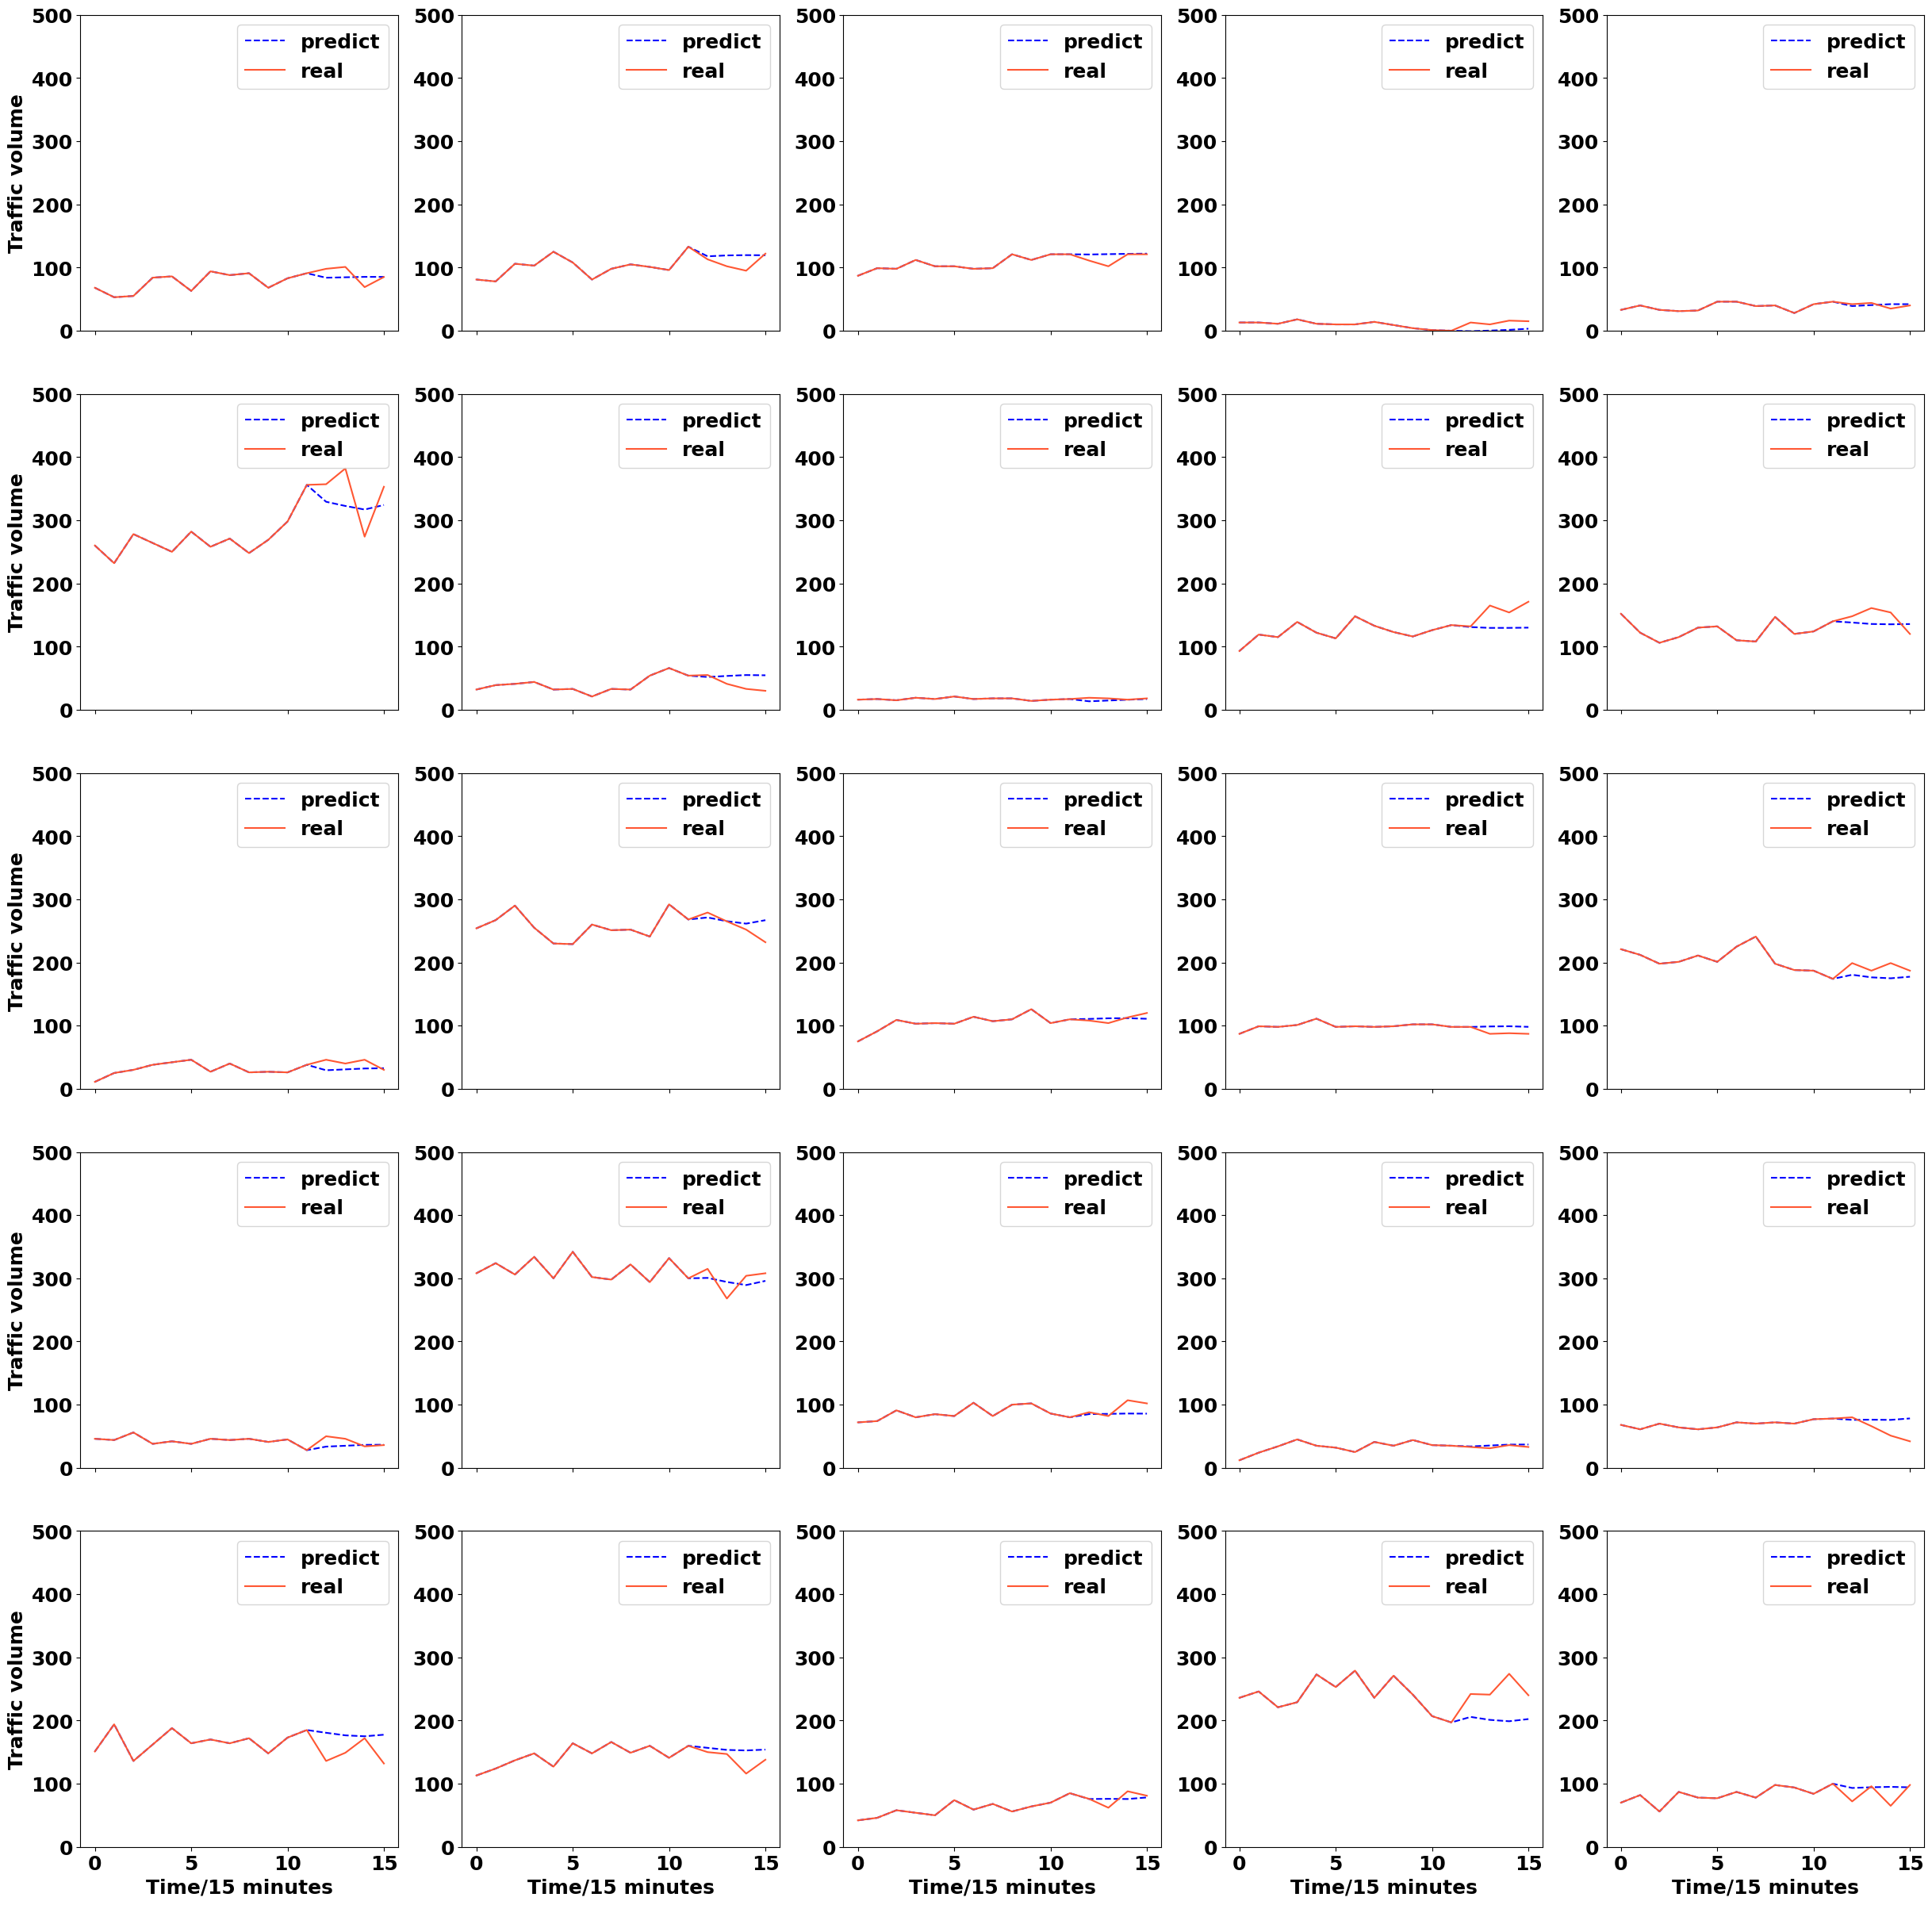

In [144]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30), sharex = True)

for i in range(5):
    for j in range(5):
        path = os.path.join(r'../Figures/Test Result/', name)
        axs[i, j].plot(s_predict[6 * i + j+ 40],label='predict', linestyle='--', color='b')
        axs[i, j].plot(s_real[6 * i + j + 40], label='real', linestyle='-', color='#FF5733')
        axs[i, j].set_ylim(0, 500)
        if i == 4:
            axs[i, j].set_xlabel('Time/15 minutes', fontweight='bold')
        if j == 0:
            axs[i, j].set_ylabel('Traffic volume', fontweight='bold')
        axs[i, j].legend()
plt.rcParams.update({'font.size': 18, 'font.weight': 'semibold'})
plt.savefig(path)

In [ ]:
ls_df = pd.read_csv(r'../Weights_project/GAT_LSTM/train_validation_loss.csv')
ls_df = ls_df[['train_loss', 'val_loss']].values
ls_df = ls_df * 156
fig = plt.figure(figsize=(15, 5))
plt.plot(ls_df[0:400, 0], label='Training')
plt.plot(ls_df[0:400, 1], label='Validation')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('MAE (vehicle/15 minutes)', fontweight='bold')
plt.legend()
plt.rcParams.update({'font.size': 15, 'font.weight': 'semibold'})
plt.savefig(r'../Figures/Training_Process.png')